Intermediate Homework Assignment\
January 2023

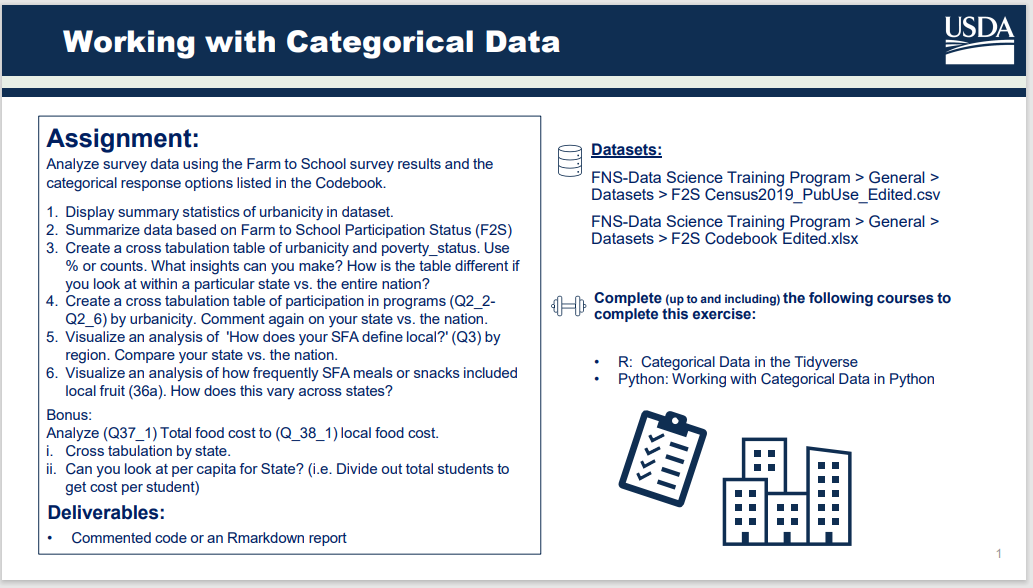

## Import Relevant Packages for doing Categorical Data Analysis 

We will need the pandas package to read our CSV file and general working with dataframes.
We will need the pyplot from matplotlib package for plotting. 

In [42]:
import pandas as pd # for working with dataframes
import matplotlib.pyplot as plt # for plotting 

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Importing the Farm to School Census 2019 Public Use dataset 
We will import the CSV file in as df_f2s_census and print the first 5 rows

In [43]:
# Establish a file path; use 'r' string to change the direction of the slash.
path_to_data = r"C:\Users\Jessica.Spencer\Documents\FNS\CODE-CHATS\DATA"

# Specify the file in the path that we use for assignment 
file_name= "F2S _Census2019_PubUse_Edited.csv"

# load data to a variable 
df_f2s_census = pd.read_csv(path_to_data + "\\" + file_name)

In [44]:
# Print first five rows 
df_f2s_census.head()

,Survey_ID,totalstudents,totalschools,urbanicity,F2S,sfa_id,sfa_size,sfa_state,sfa_zip,poverty_status,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q36_a,Q37_1,Q38_1
0,1090r93,18708,28,2.0,1,9532000020,3,DE,19804,4.0,1,0,1,1,0,7.0,3.0,4119631.0,400000.0
1,1091aax,4269,6,3.0,1,9518000090,2,DE,19960,4.0,1,1,0,1,0,9.0,4.0,1050000.0,243400.0
2,1091d13,2389,2,2.0,4,28713,2,DE,19711,1.0,0,0,0,0,1,8.0,NaN,NaN,NaN
3,1092g5v,1197,1,3.0,1,9539000030,2,DE,19980,1.0,0,0,0,0,0,2.0,1.0,284839.0,45000.0
4,109483g,428,1,1.0,1,9574000000,1,DE,19904,2.0,0,1,0,0,0,3.0,NaN,123648.0,0.0


### Question 1

Display summary statistics of Urbanicity (urbanicity) in dataset.

First we consult the second datasheet mentioned in the assignment which is called "F2S Codebook Edited.xlsx." This shows us that the variable 'urbanicity' contains numbers in the column but that those numbers in the column represent a mapping of Urban , Suburban, and Rural. Also, we see that if ever the column is blank that means that data point is "Missing"  

1. Rename the values in the column for 'urbanicity' 
2. Update blanks with "Missing" 
3. Display statistical information through .describe() and through .value_counts()

In [45]:
# Creating a mapping or pandas dictionary for 'urbanicity'
urbanicityDict = {
  1: "Urban",
  2: "Suburban",
  3: "Rural"
}

# Replacing the 1,2, and 3's in column 'urbanicity' to something more meaningful  
df_f2s_census = df_f2s_census.replace({"urbanicity": urbanicityDict})

# Print first five rows 
df_f2s_census.head()

,Survey_ID,totalstudents,totalschools,urbanicity,F2S,sfa_id,sfa_size,sfa_state,sfa_zip,poverty_status,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q36_a,Q37_1,Q38_1
0,1090r93,18708,28,Suburban,1,9532000020,3,DE,19804,4.0,1,0,1,1,0,7.0,3.0,4119631.0,400000.0
1,1091aax,4269,6,Rural,1,9518000090,2,DE,19960,4.0,1,1,0,1,0,9.0,4.0,1050000.0,243400.0
2,1091d13,2389,2,Suburban,4,28713,2,DE,19711,1.0,0,0,0,0,1,8.0,NaN,NaN,NaN
3,1092g5v,1197,1,Rural,1,9539000030,2,DE,19980,1.0,0,0,0,0,0,2.0,1.0,284839.0,45000.0
4,109483g,428,1,Urban,1,9574000000,1,DE,19904,2.0,0,1,0,0,0,3.0,NaN,123648.0,0.0


In [47]:
# The .describe() method only gives the stats for numerical data ; including 'object' gives stats for categorical data
df_f2s_census['urbanicity'].describe(include=object)

count      9696
unique        3
top       Rural
freq       6306
Name: urbanicity, dtype: object

In [49]:
# Filling in blanks within 'urbanicity' using the word 'Missing' because this was done in data mapping
df_f2s_census['urbanicity']= df_f2s_census['urbanicity'].fillna("Missing")

In [50]:
# Now the describe will mention we have four unique values in the column which accounts for "Missing"
df_f2s_census['urbanicity'].describe(include=object)

count     12025
unique        4
top       Rural
freq       6306
Name: urbanicity, dtype: object

In [51]:
# Another way to analyze 'urbanicity' would be to get the value counts 
df_f2s_census.urbanicity.value_counts()

Rural       6306
Missing     2329
Suburban    2235
Urban       1155
Name: urbanicity, dtype: int64

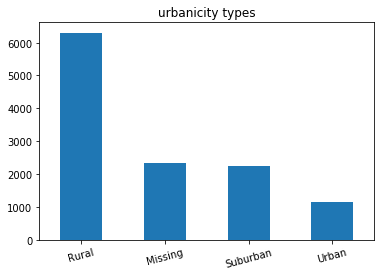

In [53]:
# A bar chart is a good way for us to display our value counts / analysis of 'urbanicity' 
df_f2s_census.urbanicity.value_counts().plot(kind="bar",
                   title="urbanicity types",
                   rot= '15')

### Question 2
Summarize data based on  Farm to School Participation Status (F2S) 

1. Rename F2S data to something more meaningful 
2. Group data by Farm to School Status 

In [54]:
# Farm to School Dictionary Update
f2sDict = {
  1: "Participating in SY2018-2019",
  2: "Began participation in SY2019-2020",
  3: "Plan to begin in future",
  4: "No participation and no plans",
  5: "No longer participating"
}

# Replace the 1-5 numbers in the column 
df_f2s_census = df_f2s_census.replace({"F2S": f2sDict})

# Print first five rows 
df_f2s_census.head()

,Survey_ID,totalstudents,totalschools,urbanicity,F2S,sfa_id,sfa_size,sfa_state,sfa_zip,poverty_status,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q36_a,Q37_1,Q38_1
0,1090r93,18708,28,Suburban,Participating in SY2018-2019,9532000020,3,DE,19804,4.0,1,0,1,1,0,7.0,3.0,4119631.0,400000.0
1,1091aax,4269,6,Rural,Participating in SY2018-2019,9518000090,2,DE,19960,4.0,1,1,0,1,0,9.0,4.0,1050000.0,243400.0
2,1091d13,2389,2,Suburban,No participation and no plans,28713,2,DE,19711,1.0,0,0,0,0,1,8.0,NaN,NaN,NaN
3,1092g5v,1197,1,Rural,Participating in SY2018-2019,9539000030,2,DE,19980,1.0,0,0,0,0,0,2.0,1.0,284839.0,45000.0
4,109483g,428,1,Urban,Participating in SY2018-2019,9574000000,1,DE,19904,2.0,0,1,0,0,0,3.0,NaN,123648.0,0.0


In [55]:
# Group the data on F2S
gk_f2s = df_f2s_census.groupby(by=['F2S'])

# Printing the first entries in all the groups formed. There were 5 groups formed for the five mappings for F2S
gk_f2s.first()

,Survey_ID,totalstudents,totalschools,urbanicity,sfa_id,sfa_size,sfa_state,sfa_zip,poverty_status,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q36_a,Q37_1,Q38_1
F2S,,,,,,,,,,,,,,,,,,
Began participation in SY2019-2020,109rl7k,294,8,Missing,3804200000,1,DE,19904,4.0,0,0,0,0,0,6.0,NaN,NaN,NaN
No longer participating,109ea5j,3508,7,Suburban,9523000070,2,DE,19973,4.0,1,1,0,1,0,7.0,NaN,NaN,NaN
No participation and no plans,1091d13,2389,2,Suburban,28713,2,DE,19711,1.0,0,0,0,0,1,8.0,NaN,NaN,NaN
Participating in SY2018-2019,1090r93,18708,28,Suburban,9532000020,3,DE,19804,4.0,1,0,1,1,0,7.0,3.0,4119631.0,400000.0
Plan to begin in future,123d4ii,54,1,Missing,5419,1,MD,21244,3.0,0,1,0,0,0,6.0,NaN,NaN,NaN


In [21]:
# Group by method can be used without creating a variable 
# Group by method can also be called to get the mean / sum / etc of the numerical data in the group
df_f2s_census.groupby(by=['F2S']).mean()

,totalstudents,totalschools,sfa_size,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q37_1,Q38_1
F2S,,,,,,,,,,,
Began participation in SY2019-2020,2243.130835,4.559582,1.482801,0.197789,0.097052,0.119165,0.282555,0.144349,7.010442,NaN,NaN
No longer participating,1459.166102,3.308475,1.332203,0.176271,0.122034,0.118644,0.291525,0.159322,7.498305,NaN,NaN
No participation and no plans,852.614626,2.535694,1.211259,0.117237,0.060940,0.070807,0.205456,0.240279,8.337979,NaN,NaN
Participating in SY2018-2019,4160.298187,7.309803,1.708833,0.308272,0.235895,0.210620,0.435027,0.095354,6.642456,801205.082425,131299.581327
Plan to begin in future,1785.192661,3.904587,1.376147,0.157798,0.110092,0.124771,0.324771,0.161468,7.844037,NaN,NaN


We may also want want to summarize or group by more than one category

Farm to School Participation Status based on School Food Authorities (SFA) by state 

In [56]:
# Grouping data by F2S and SFA state 
gk_f2s_sfa_state = df_f2s_census.groupby(by=['F2S', 'sfa_state'])

# Print the first value in each group with .first() 
gk_f2s_sfa_state.first()

Survey_ID  totalstudents  \
F2S                                sfa_state                            
Began participation in SY2019-2020 AK          70208zm              4   
                                   AL          5013f4p           3041   
                                   AR          6051b4a            553   
                                   AZ          7041tgx            109   
                                   CA          70608p0           2963   
...                                                ...            ...   
Plan to begin in future            VA          151916b           3771   
                                   WA          7521i3y            335   
                                   WI          2541ixs            177   
                                   WV          153zn9g             12   
                                   WY          355j6gr            261   

                                              totalschools urbanicity  \
F2S                                sfa_state                            
Began participation in SY2019-2020 AK                    2    Missing   
                                   AL                   11      Rural   
                                   AR                    2      Rural   
                                   AZ                    1      Rural   
                                   CA                    6   Suburban   
...                                                    ...        ...   
Plan to begin in future            VA                   11      Rural   
                                   WA                    1      Rural   
                                   WI                    1    Missing   
                                   WV                    1    Missing   
                                   WY                    1      Rural   

                                                sfa_id  sfa_size sfa_zip  \
F2S                                sfa_state                               
Began participation in SY2019-2020 AK            26901         1   99611   
                                   AL               24         2   36702   
                                   AR          7105000         1   72013   
                                   AZ         10309000         1   85940   
                                   CA             1900         2   94941   
...                                                ...       ...     ...   
Plan to begin in future            VA               83         2   24266   
                                   WA           159374         1   98638   
                                   WI           591130         1   53081   
                                   WV           50654          1   26035   
                                   WY           740001         1   82524   

                                              poverty_status  Q2_2  Q2_3  \
F2S                                sfa_state                               
Began participation in SY2019-2020 AK                    1.0     0     0   
                                   AL                    4.0     0     0   
                                   AR                    4.0     0     0   
                                   AZ                    4.0     0     0   
                                   CA                    1.0     0     0   
...                                                      ...   ...   ...   
Plan to begin in future            VA                    3.0     0     0   
                                   WA                    2.0     0     0   
                                   WI                    2.0     0     0   
                                   WV                    NaN     0     0   
                                   WY                    4.0     1     0   

                                              Q2_4  Q2_5  Q2_6    Q3  Q36_a  \
F2S                                sfa_state                                  
Began par

### Question 3 
Create a cross tabulation to check the relation between urbanicity and poverty_status. Use % or counts. 

Cross tabulation is performed on categorical data. Cross tabulation tables are very similar to pivot table in Excel. Cross tabulations are used to examine relationships within data that may not be readily apparent. Cross tabulation is especially useful for studying market reserach or survey responses such as in our case with the farm to school survey data.

1. Rename Poverty Status values to something more meaningful 
2. Create cross tabulation to check the relation between urbanicity and poverty_status (with respect to total students in survey). 

In [57]:
# Farm to School Dictionary Update
poverty_statusDict = {
 1: "Quartile 1 - Free/Reduced Price Lunch (31% or fewer students eligible for FRPL)",
 2: "Quartile 2 - Free/Reduced Price Lunch (more than 31% and up to 51% students eligible for FRPL)",
 3: "Quartile 3 - Free/Reduced Price Lunch (more than 51% and up to 86% students eligible for FRPL)",
 4: "Quartile 4 - Free/Reduced Price Lunch (more than 86% students eligible for FRPL)"
}

# Replace the 1-5 numbers in the column 
df_f2s_census = df_f2s_census.replace({"poverty_status": poverty_statusDict})

# Print first five rows 
df_f2s_census.head()

,Survey_ID,totalstudents,totalschools,urbanicity,F2S,sfa_id,sfa_size,sfa_state,sfa_zip,poverty_status,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q3,Q36_a,Q37_1,Q38_1
0,1090r93,18708,28,Suburban,Participating in SY2018-2019,9532000020,3,DE,19804,Quartile 4 - Free/Reduced Price Lunch (more th...,1,0,1,1,0,7.0,3.0,4119631.0,400000.0
1,1091aax,4269,6,Rural,Participating in SY2018-2019,9518000090,2,DE,19960,Quartile 4 - Free/Reduced Price Lunch (more th...,1,1,0,1,0,9.0,4.0,1050000.0,243400.0
2,1091d13,2389,2,Suburban,No participation and no plans,28713,2,DE,19711,Quartile 1 - Free/Reduced Price Lunch (31% or ...,0,0,0,0,1,8.0,NaN,NaN,NaN
3,1092g5v,1197,1,Rural,Participating in SY2018-2019,9539000030,2,DE,19980,Quartile 1 - Free/Reduced Price Lunch (31% or ...,0,0,0,0,0,2.0,1.0,284839.0,45000.0
4,109483g,428,1,Urban,Participating in SY2018-2019,9574000000,1,DE,19904,Quartile 2 - Free/Reduced Price Lunch (more th...,0,1,0,0,0,3.0,NaN,123648.0,0.0


In [58]:
# Create a cross tabulation to check the relation between urbanicity and poverty_status (with respect to total students in survey). Use % or counts.
pd.crosstab(df_f2s_census.urbanicity,
            df_f2s_census.poverty_status,
            values=df_f2s_census.totalstudents,
            dropna=False,
            margins=True,
            margins_name="Total",
           aggfunc='mean').round(0)

poverty_status,Quartile 1 - Free/Reduced Price Lunch (31% or fewer students eligible for FRPL),Quartile 2 - Free/Reduced Price Lunch (more than 31% and up to 51% students eligible for FRPL),Quartile 3 - Free/Reduced Price Lunch (more than 51% and up to 86% students eligible for FRPL),Quartile 4 - Free/Reduced Price Lunch (more than 86% students eligible for FRPL),Total
urbanicity,,,,,
Missing,479.0,414.0,1098.0,571.0,487.0
Rural,1392.0,1499.0,1709.0,1722.0,1589.0
Suburban,5247.0,8285.0,10815.0,4526.0,6897.0
Urban,8225.0,8980.0,15762.0,9186.0,10863.0
Total,2650.0,2977.0,4624.0,3311.0,3253.0


### Question 4
Create a cross tabulation table  of participation in programs (Q2_2-Q2_6) by urbanicity.

1. Rename the values to something more meaningful 
2. Reduce the data / melt the columns to long format 
3. Cross tabulation table participation in programs (Q2_2-Q2_6) by urbanicity (with respect to total students) in survey. 

In [59]:
# Rename columns to somethign more meaningful 
q2_updatedCols= {"Q2_2" : "Participates in Fresh Fruit and Vegetable Program (FFVP)",

"Q2_3" : "Participates in Child and Adult Food Program (CACFP)",

"Q2_4" : "Participates in Child and Adult Food Program (CACFP) At-Risk Afterschool",

"Q2_5" : "Participates in Summer meals",

"Q2_6" : "No FNS Child Nutrition Programs in addition to NSLP"}

# Update the column names for the Q2-6 columns 
df_f2s_census = df_f2s_census.rename(columns =q2_updatedCols)

# Create dictionary to update the values in Q2-6 columns
updateDict = {0:"Not Selected", 
           1: "Selected"}

varUsed = list(q2_updatedCols.values())

# loop to update responses in the columns to something more meaningful 
for var in varUsed:
    df_f2s_census = df_f2s_census.replace({var: updateDict})

# Print first five rows 
df_f2s_census.head()

,Survey_ID,totalstudents,totalschools,urbanicity,F2S,sfa_id,sfa_size,sfa_state,sfa_zip,poverty_status,Participates in Fresh Fruit and Vegetable Program (FFVP),Participates in Child and Adult Food Program (CACFP),Participates in Child and Adult Food Program (CACFP) At-Risk Afterschool,Participates in Summer meals,No FNS Child Nutrition Programs in addition to NSLP,Q3,Q36_a,Q37_1,Q38_1
0,1090r93,18708,28,Suburban,Participating in SY2018-2019,9532000020,3,DE,19804,Quartile 4 - Free/Reduced Price Lunch (more th...,Selected,Not Selected,Selected,Selected,Not Selected,7.0,3.0,4119631.0,400000.0
1,1091aax,4269,6,Rural,Participating in SY2018-2019,9518000090,2,DE,19960,Quartile 4 - Free/Reduced Price Lunch (more th...,Selected,Selected,Not Selected,Selected,Not Selected,9.0,4.0,1050000.0,243400.0
2,1091d13,2389,2,Suburban,No participation and no plans,28713,2,DE,19711,Quartile 1 - Free/Reduced Price Lunch (31% or ...,Not Selected,Not Selected,Not Selected,Not Selected,Selected,8.0,NaN,NaN,NaN
3,1092g5v,1197,1,Rural,Participating in SY2018-2019,9539000030,2,DE,19980,Quartile 1 - Free/Reduced Price Lunch (31% or ...,Not Selected,Not Selected,Not Selected,Not Selected,Not Selected,2.0,1.0,284839.0,45000.0
4,109483g,428,1,Urban,Participating in SY2018-2019,9574000000,1,DE,19904,Quartile 2 - Free/Reduced Price Lunch (more th...,Not Selected,Selected,Not Selected,Not Selected,Not Selected,3.0,NaN,123648.0,0.0


In [60]:
# Using melt for preprocessing 
# Melting or putting the data for Q2-Q6 in long format or reshaping the data allows us to works with
# the data frame more easily.
df_upp = df_f2s_census.melt(id_vars = ['urbanicity', 'totalschools','totalstudents'],
         value_vars = varUsed, 
         var_name = 'list_of_programs', value_name = 'program_participation_status' )

# Showing first five rows of the melted dataframe 
df_upp.head()

,urbanicity,totalschools,totalstudents,list_of_programs,program_participation_status
0,Suburban,28,18708,Participates in Fresh Fruit and Vegetable Prog...,Selected
1,Rural,6,4269,Participates in Fresh Fruit and Vegetable Prog...,Selected
2,Suburban,2,2389,Participates in Fresh Fruit and Vegetable Prog...,Not Selected
3,Rural,1,1197,Participates in Fresh Fruit and Vegetable Prog...,Not Selected
4,Urban,1,428,Participates in Fresh Fruit and Vegetable Prog...,Not Selected


In [61]:
# Crosstab using counts for Q2-Q6 being compared with the urbanicity counts with respect to the mean
# students in survey
pd.crosstab(df_upp.list_of_programs,
            margins=True,
            margins_name="Total",
            columns = [df_upp.urbanicity,
                       df_upp.program_participation_status],
           values=df_upp.totalstudents,
            aggfunc='mean').round(0)

urbanicity                                              Missing           \
program_participation_status                       Not Selected Selected   
list_of_programs                                                           
No FNS Child Nutrition Programs in addition to ...        632.0    217.0   
Participates in Child and Adult Food Program (C...        460.0    734.0   
Participates in Child and Adult Food Program (C...        444.0    831.0   
Participates in Fresh Fruit and Vegetable Progr...        355.0   1132.0   
Participates in Summer meals                              305.0   1561.0   
Total                                                     430.0    754.0   

urbanicity                                                Rural           \
program_participation_status                       Not Selected Selected   
list_of_programs                                                           
No FNS Child Nutrition Programs in addition to ...       1666.0    557.0   
Participates in Child and Adult Food Program (C...       1460.0   2108.0   
Participates in Child and Adult Food Program (C...       1399.0   2595.0   
Participates in Fresh Fruit and Vegetable Progr...       1515.0   1784.0   
Participates in Summer meals                             1015.0   2386.0   
Total                                                    1440.0   2105.0   

urbanicity                                             Suburban           \
program_participation_status                       Not Selected Selected   
list_of_programs                                                           
No FNS Child Nutrition Programs in addition to ...       7454.0   1556.0   
Participates in Child and Adult Food Program (C...       5291.0  13376.0   
Participates in Child and Adult Food Program (C...       4688.0  15658.0   
Participates in Fresh Fruit and Vegetable Progr...       5488.0  11112.0   
Participates in Summer meals                             3139.0  12472.0   
Total                                                    5379.0  11992.0   

urbanicity                                                Urban           \
program_participation_status                       Not Selected Selected   
list_of_programs                                                           
No FNS Child Nutrition Programs in addition to ...      11465.0    933.0   
Participates in Child and Adult Food Program (C...       7867.0  20360.0   
Participates in Child and Adult Food Program (C...       6490.0  20367.0   
Participates in Fresh Fruit and Vegetable Progr...       7431.0  17467.0   
Participates in Summer meals                             1978.0  18857.0   
Total                                                    7689.0  18409.0   

urbanicity                                           Total  
program_participation_status                                
list_of_programs                                            
No FNS Child Nutrition Programs in addition to ...  3253.0  
Participates in Child and Adult Food Program (C...  3253.0  
Participates in Child and Adult Food Program (C...  3253.0  
Participates in Fresh Fruit and Vegetable Progr...  3253.0  
Participates in Summer meals                        3253.0  
Total                                               3253.0

### Question 5
Visualize an analysis of  'How does your SFA define local?' (Q3) by region! 

1. Rename the values to something more meaningful 
2. Keep only the values in the "How does your SFA define 'local'for the majority of its school food procurement" Q3 column related to produced Produced within the region
3. We display Analysis in Pie and Bar chart for SFA define local?' (Q3) by region!

Total number SFA produced within the region: 704


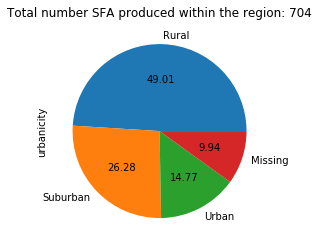

In [40]:
# Use python dict to give the categorial value in the column Q3 names 

sfa_regionDict = {
  1: "Produced within a 20 mile radius",
  2: "Produced within a 50 mile radius",
  3: "Produced within a 100 mile radius",
  4:"Produced within a 200 mile radius",
  5: "Produced within the county",
  6: "Produced within the State",
  7:"Produced within the region",
  8:"Other",
  9: "No set definition for local",
  10: "Don’t know"
}
# Use replace to updaet the Q3 values 
df_f2s_census=df_f2s_census.replace({"Q3": sfa_regionDict})

# Removing Q3 values that do not say produced within the region 
Q3_Region = df_f2s_census[df_f2s_census["Q3"] == "Produced within the region"]\
       .reset_index(drop=True)

print('Total number SFA produced within the region:', len(Q3_Region))

#  visualize analysis of the SFA local types in pie chart by using urbanicity to better see the 
Q3_Region['urbanicity'].value_counts().plot(kind="pie",
                       # used f string to place column total within title 
                       title=f"Total number SFA produced within the region: {len(Q3_Region)}",
                       autopct='%.2f')


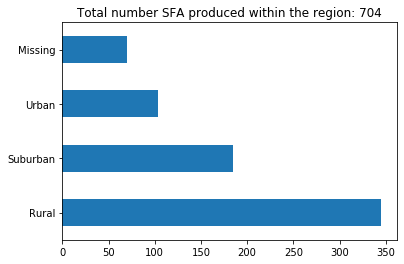

In [30]:
#  visualize analysis of the SFA local types in bar chart to better see 
Q3_Region['urbanicity'].value_counts().plot(kind="barh",
                              # Made the title more meaningful with the SFA produced dataframe count
                              # Used f strings below to use code within the text 
                              title=f"Total number SFA produced within the region: {len(Q3_Region)}")

### Queston 6
Visualize an analysis of how frequently SFA meals or snacks included local fruit (36a).

1. Rename the values to something more meaningful 
2. Display data (we chose a bar chart with horrizontal axes )

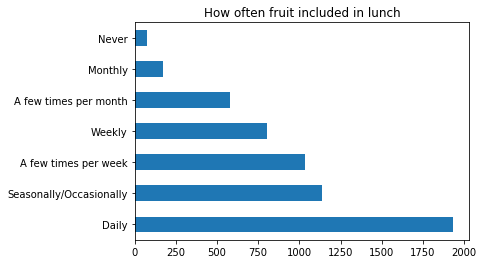

In [36]:
# use python dict to give the categorial value in the column Q36_a names 

sfa_fruitDict = {
  1: "Daily",
  2: "A few times per week",
  3: "Weekly",
  4:"A few times per month",
  5: "Monthly",
  6: "Seasonally/Occasionally",
  7:"Never"
}
# use replace to updaet the Q36_a values 
df_f2s_census = df_f2s_census.replace({"Q36_a": sfa_fruitDict})

#  visualize analysis of the SFA local types in bar chart version to better see 
df_f2s_census['Q36_a'].value_counts().plot(kind="barh",
                              title="How often fruit included in lunch")